In [16]:
"""
CART Implementation for Class Imbalance Study

Original Reference Implementation:
- Adapted from zziz/cart (https://github.com/zziz/cart)
- Clean-room implementation without direct code copying

Key Modifications from Reference:
1. Architecture Simplification:
   - Removed regression functionality to focus purely on classification
   - Unified tree structure with dedicated TreeNode class
   - Simplified API (removed pruning parameters, consolidated initialization)

2. Project-Specific Optimizations:
   - Direct compatibility with preprocessed numpy arrays (from data/processed/)
   - Binary classification focus with class label tracking
   - Early stopping criteria aligned with imbalance analysis needs
   - Memory-efficient node structure for large datasets

3. Phase 2 Readiness:
   - Modular impurity calculations for weighted Gini modification
   - Class label preservation for imbalance weighting
   - Predict method optimized for probability-based metrics (ROC-AUC)

Implementation Differences from Reference:
- No sklearn dependencies
- Removed print_tree visualization methods
- Simplified split criteria to essential parameters
- Vectorized impurity calculations for performance
- Added sample counting for imbalance analysis

Important Notes:
- Designed for binary classification (handles multi-class through majority voting)
- Requires preprocessed numerical features (compatible with utils/preprocess.py)
- Class labels stored in self.classes for Phase 2 modifications

Maintains Core CART Functionality:
- Gini/Entropy split criteria
- Depth-based stopping
- Recursive tree construction
- Majority class prediction
"""

'\nCART Implementation for Class Imbalance Study\n\nOriginal Reference Implementation:\n- Adapted from zziz/cart (https://github.com/zziz/cart)\n- Clean-room implementation without direct code copying\n\nKey Modifications from Reference:\n1. Architecture Simplification:\n   - Removed regression functionality to focus purely on classification\n   - Unified tree structure with dedicated TreeNode class\n   - Simplified API (removed pruning parameters, consolidated initialization)\n\n2. Project-Specific Optimizations:\n   - Direct compatibility with preprocessed numpy arrays (from data/processed/)\n   - Binary classification focus with class label tracking\n   - Early stopping criteria aligned with imbalance analysis needs\n   - Memory-efficient node structure for large datasets\n\n3. Phase 2 Readiness:\n   - Modular impurity calculations for weighted Gini modification\n   - Class label preservation for imbalance weighting\n   - Predict method optimized for probability-based metrics (ROC-A

# Setup

In [2]:
import os
import sys

root = os.getcwd()  # current working directory should be the project root
src_path = os.path.join(root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

Since there was so much data missing from the datasets, whether it was a row with many NaN (Not a Number) values or a column with the same issue, we thought the best way to solve that was to preprocess the datasets' data. So we came up with the following program, which reads the data first (in data/raw) and then processes them. Then, it inserts the processed data into the data/processed directory, where the trained and tested data are all separated in different files (X_train.csv, X_test.csv, y_train.csv, y_test.csv).

In [4]:
from utils.preprocess import preprocess_datasets

preprocess_datasets()

data/processed/class_imbalance:
Processing dataset_1000_hypothyroid.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1002_ipums_la_98-small.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1004_synthetic_control.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1013_analcatdata_challenger.csv...
Classes: [np.int64(0), np.int64(1)] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1014_analcatdata_dmft.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1016_vowel.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1018_ipums_la_99-small.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1020_mfeat-karhunen.csv...
Cla

Unlike the code that inspired our work (zziz/cart), our CART version has more than one class. It has two: one for the tree node (TreeNode) and the other for CART itself (DecisionTree).

# Evaluation

In [3]:
from utils.evaluation import evaluate, save_results

results = evaluate(data_dir="data/processed/class_imbalance/", max_datasets=10)
save_results(results, "results/class_imbalance_evaluation.csv")


Evaluating for dataset: dataset_1000_hypothyroid
Evaluating for dataset: dataset_1002_ipums_la_98-small
Evaluating for dataset: dataset_1004_synthetic_control
Evaluating for dataset: dataset_1013_analcatdata_challenger
Evaluating for dataset: dataset_1014_analcatdata_dmft
Evaluating for dataset: dataset_1016_vowel
Evaluating for dataset: dataset_1018_ipums_la_99-small
Evaluating for dataset: dataset_1020_mfeat-karhunen
Evaluating for dataset: dataset_1021_page-blocks
Evaluating for dataset: dataset_1022_mfeat-pixel


# Visualization of Results

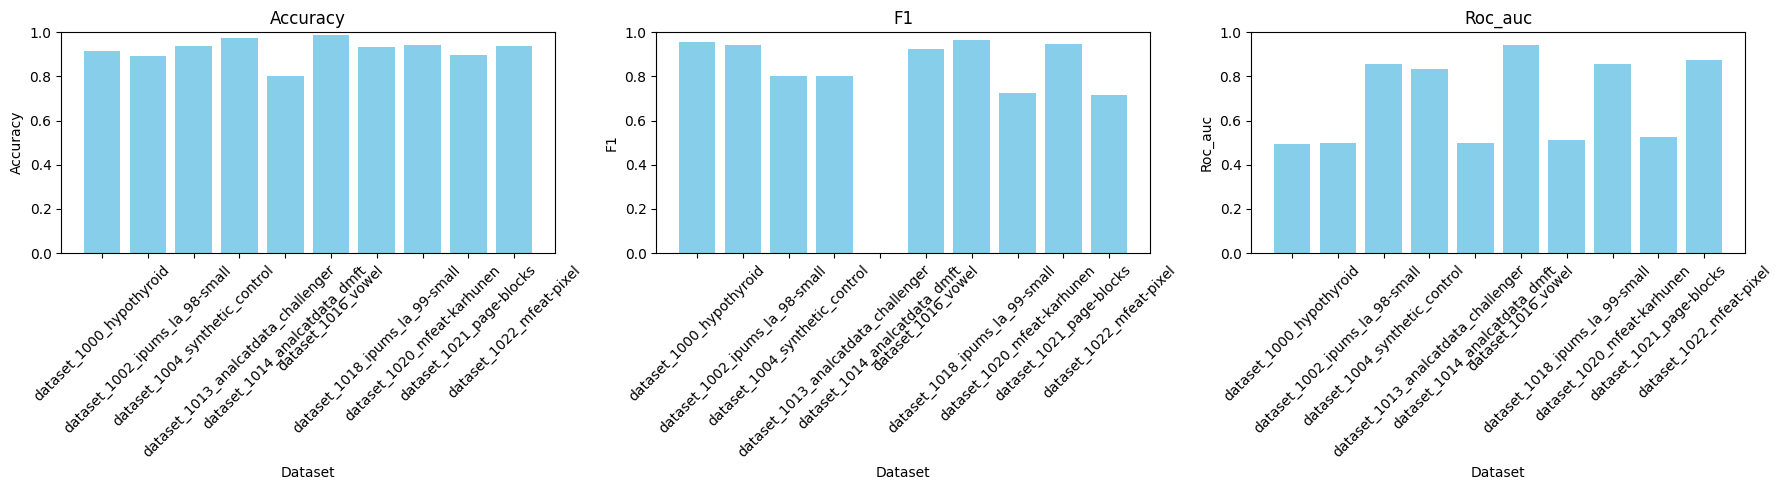

In [4]:
from utils.visualization import plot_evaluation_results

plot_evaluation_results(results)